In [1]:
import numpy as np
import pandas as pd

In [86]:
df = pd.read_csv(r'C:/Users/r.vardhan.reddy/Downloads/titanic.csv', usecols = ['Pclass','Age','Fare','Survived'])

In [14]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [61]:
z=dict(df.isnull().sum())

In [62]:
z

{'Survived': 0, 'Pclass': 0, 'Age': 177, 'Fare': 0}

In [73]:
[x for x in df.columns if df[x].isnull().sum()>1]
  

['Age']

In [19]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [22]:
df['Age'].fillna((df['Age']).median() ,inplace=True)

In [74]:
df.isna().sum().any()

True

In [87]:
a=df.select_dtypes('O')
a

""
0
1
2
3
4
...
886
887
888
889


In [83]:
df['Age'].dtype

dtype('float64')

In [24]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [26]:
X

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)

In [29]:
X_train

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [33]:
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
min_max = MinMaxScaler()

In [38]:
df2=pd.DataFrame(min_max.fit_transform(X),columns=X_train.columns)

In [39]:
df2

,Pclass,Age,Fare
0,1.0,0.271174,0.014151
1,0.0,0.472229,0.139136
2,1.0,0.321438,0.015469
3,0.0,0.434531,0.103644
4,1.0,0.434531,0.015713
...,...,...,...
886,0.5,0.334004,0.025374
887,0.0,0.233476,0.058556
888,1.0,0.346569,0.045771
889,0.0,0.321438,0.058556


In [88]:
df2 = pd.read_csv(r'C:/Users/r.vardhan.reddy/Downloads/titanic.csv')

In [89]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#print null values column names
features = [features for features in df2.columns if df2[features].isnull().sum()>1]
features

['Age', 'Cabin', 'Embarked']

In [93]:
#print int  values column names
features = [features for features in df2.columns if df2[features].dtype == 'int64']
features

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [94]:
df2.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [95]:
import seaborn as sns

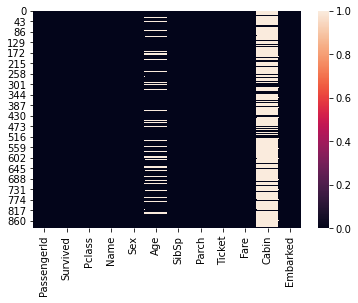

In [97]:
sns.heatmap(df2.isnull())

In [99]:
df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


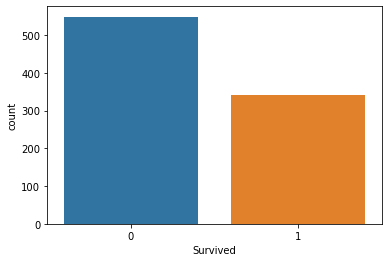

In [103]:
sns.countplot(x='Survived',data=df2)

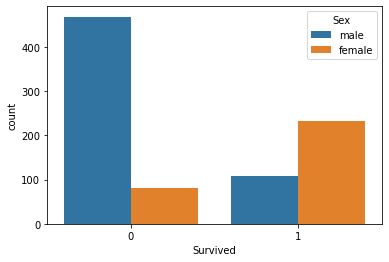

In [106]:
sns.countplot(x='Survived',hue='Sex',data=df2)

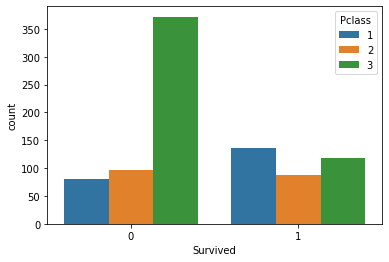

In [107]:
sns.countplot(x='Survived',hue='Pclass',data=df2)

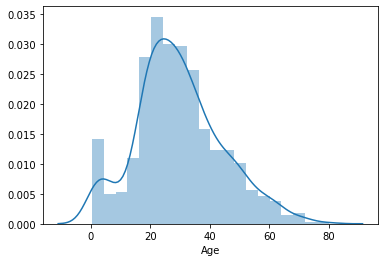

In [108]:
sns.distplot(df['Age'],kde=True)

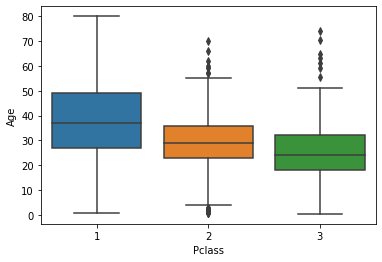

In [109]:
sns.boxplot(x='Pclass',y='Age',data=df2)